## Chapter 5 Graphical Models

In [1]:
import copy
import japanize_matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib.pyplot import imshow
from numpy.random import randn
from scipy import stats

C:\Users\prof-\anaconda3\lib\site-packages\japanize_matplotlib\japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


## 5.1 Graphical Models

## 5.2 Graphical Lasso

In [2]:
import copy as c

In [3]:
def inner_prod(x, y):
    return np.dot(x, y)
def soft_th(lambd, x):
    return np.sign(x) * np.maximum(np.abs(x) - lambd, 0)

In [4]:
def graph_lasso(s, lambd=0):
    s = np.array(s)
    W = s; p = s.shape[1]; beta = np.zeros((p-1, p)); w = s.shape[0]
    beta_out = beta; eps_out = 1
    while eps_out > 0.01:
        for j in range(p):
            a = np.delete(np.delete(W, j, 0), j, 1); b = np.delete(s, j, 0)[:, j]
            beta_in = beta[:, j]; eps_in = 1
            while eps_in > 0.01:
                for h in range(p - 1):
                    cc = b[h] - inner_prod(np.delete(a, h, 1)[h, :],
                                           np.delete(beta, h, 0)[:, j])
                    beta[h, j] = soft_th(lambd, cc) / a[h, h]
                eps_in = np.max(beta[:, j]-beta_in); beta_in = beta[:, j]
            m = list(np.arange(j)); n = list(np.arange(j+1, w)); z = m + n
            W[z, j] = np.dot(a, beta[:, j])
        eps_out = np.max(beta - beta_out); beta_out = beta
    theta = np.zeros((p, p))
    for j in range(p - 1):
        m1 = list(np.arange(j)); n1 = list(np.arange(j+1, p)); z1 = m1 + n1
        theta[j, j] = 1 / (W[j, j] - np.dot(np.delete(W, j, 1)[j, :], beta[:, j]))
        theta[z1, j] = -beta[:, j] * theta[j, j]
    return theta

In [5]:
Theta = np.array([   2,  0.6,    0,    0,  0.5,  0.6,    2, -0.4,  0.3,    0,
                     0, -0.4,    2, -0.2,    0,    0,  0.3, -0.2,    2, -0.2,
                   0.5,    0,    0, -0.2,    2]).reshape(-1, 5)
Sigma = np.linalg.inv(Theta)
meanvex = np.repeat(0, 5)
dat = np.random.multivariate_normal(meanvex, Sigma, 20)
# Generate a sample matrix using the options meanvec・郡igma・系o.row・径nd d
s = np.dot(dat.T, dat) / dat.shape[0]

In [6]:
print(Theta)
print(graph_lasso(s))
print(graph_lasso(s, lambd=0.015))
print(graph_lasso(s, lambd=0.03))
print(graph_lasso(s, lambd=0.05))

[[ 2.   0.6  0.   0.   0.5]
 [ 0.6  2.  -0.4  0.3  0. ]
 [ 0.  -0.4  2.  -0.2  0. ]
 [ 0.   0.3 -0.2  2.  -0.2]
 [ 0.5  0.   0.  -0.2  2. ]]
[[ 2.40168453  0.24593546  0.04601825  0.96692683  0.        ]
 [ 0.27198762  4.82230671  0.0215085   0.38276387  0.        ]
 [ 0.04865042  0.05742407  3.70718701 -0.97871121  0.        ]
 [ 0.8448235   0.34269078 -0.95259466  3.38695642  0.        ]
 [ 0.2571265   0.67632588 -0.26562253 -0.6326602   0.        ]]
[[ 2.29875159  0.09471706  0.          0.79941084  0.        ]
 [ 0.1035338   4.66987164  0.          0.09177917  0.        ]
 [ 0.          0.          3.56828835 -0.8164814   0.        ]
 [ 0.72546782  0.11071947 -0.80111336  3.13779311  0.        ]
 [ 0.16447145  0.51555964 -0.16322442 -0.60358153  0.        ]]
[[ 2.22247034  0.          0.          0.66080191  0.        ]
 [ 0.          4.59689856  0.          0.          0.        ]
 [ 0.          0.          3.46065148 -0.64922974  0.        ]
 [ 0.61201444  0.         -0.64629654 

In [7]:
from sklearn.covariance import graphical_lasso

In [8]:
print(np.linalg.inv(s))
print(graphical_lasso(s, alpha=0))
print(graphical_lasso(s, alpha=0.5))

[[ 2.35551859  0.43565404 -0.29864996  0.83137072  0.33046887]
 [ 0.43565404  4.82965978 -0.20633828  0.23922045  0.78760249]
 [-0.29864996 -0.20633828  3.66552645 -0.97223009 -0.35725924]
 [ 0.83137072  0.23922045 -0.97223009  3.26689033 -0.64615007]
 [ 0.33046887  0.78760249 -0.35725924 -0.64615007  3.05329944]]
(array([[ 0.48832949, -0.02490458, -0.00606176, -0.13941097, -0.07664129],
       [-0.02490458,  0.21991056, -0.00113999, -0.02172696, -0.05876203],
       [-0.00606176, -0.00113999,  0.30561904,  0.1042009 ,  0.05876126],
       [-0.13941097, -0.02172696,  0.1042009 ,  0.3973152 ,  0.11696697],
       [-0.07664129, -0.05876203,  0.05876126,  0.11696697,  0.38259592]]), array([[ 2.35551859,  0.43565404, -0.29864996,  0.83137072,  0.33046887],
       [ 0.43565404,  4.82965978, -0.20633828,  0.23922045,  0.78760249],
       [-0.29864996, -0.20633828,  3.66552645, -0.97223009, -0.35725924],
       [ 0.83137072,  0.23922045, -0.97223009,  3.26689033, -0.64615007],
       [ 0.3304

In [9]:
def adj(mat):
    p = mat.shape[1]; ad = np.zeros((p, p))
    for i in range(p - 1):
        for j in range((i + 1), p):
            if mat[i, j] == 0:
                ad[i, j] = 0
            else:
                ad[i, j] = 1
    g = igraph.Graph.Adjacency(ad.tolist(), mode=igraph.ADJ_MAX)
    g.vs["label"] = list(range(g.vcount()))
    return igraph.plot(g, bbox=(300, 300))

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("breastcancer.csv")
df.drop(df.columns[len(df.columns) - 1], axis=1, inplace=True)
df = df.values

In [12]:
w = np.zeros((250, 1000))
for i in range(1000):
    w[:, i] = df[:, i]
x = w; s = np.dot(x.T, x) / 250
fit = graphical_lasso(s, 0.75)
print(np.sum(list(map(lambda x: x == 0, fit[1]))))
y = pd.DataFrame(columns=["y"]); z = pd.DataFrame(columns=["z"])
for i in range(999):
    for j in range((i + 1), 1000):
        if fit[1][i, j] != 0:
            y = y.append(pd.DataFrame({"y": [i]}))
            z = z.append(pd.DataFrame({"z": [j]}))
y.index = np.arange(1, len(y) + 1)
z.index = np.arange(1, len(z) + 1)
edges = pd.concat([y, z], axis=1)
edges.to_csv("edges.csv")

993766


## 5.3 Estimation of the Graphical Model based on the Quasi-likelihood

In [13]:
from IPython.core.display import display, SVG
import igraph
import pandas as pd
from sklearn.linear_model import ElasticNet

In [14]:
df = pd.read_csv("breastcancer.csv")
df.drop(df.columns[len(df.columns) - 1], axis=1, inplace=True)
df = df.values

In [15]:
n = 250; p = 50
w = np.zeros((n, p))
for i in range(p):
    w[:, i] = df[:, i]
x = w[:, range(p)]; lambd = 0.1
model = list()
for j in range(p):
    m2 = list(np.arange(j)); n2 = list(np.arange(j + 1, p)); z2 = m2 + n2
    model.append(ElasticNet(alpha=lambd, l1_ratio=1).fit(X=x[:, z2], y=x[:, j]))
ad = np.zeros((p, p))
for i in range(p):
    for j in range(p - 1):
        k = j
        if j >= i:
            k = j + 1
        if model[i].coef_[j] != 0:
            ad[i, k] = 1
        else:
            ad[i, k] = 0

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 31, 31, 32, 32, 33, 33, 33, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 37, 37, 37, 39, 39, 41, 41, 42, 42, 42, 43, 43, 44, 44, 46, 46, 46, 48] [1, 11, 12, 17, 21, 22, 23, 27, 40, 45, 47, 49, 3, 4, 9, 15, 17, 20, 22, 25, 26, 33, 36, 42, 8, 9, 14, 18, 19, 20, 23, 

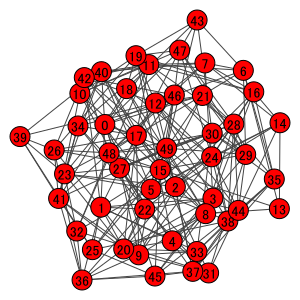

In [16]:
# for AND
for i in range(p - 1):
    for j in range(i + 1, p):
        if ad[i, j] != ad[i, j]:
            ad[i, j] = 0; ad[j, i] = 0
u = list(); v = list()
for i in range(p - 1):
    for j in range(i + 1, p):
        if ad[i, j] == 1:
            u.append(i)
            v.append(j)
print(u, v)
print(ad)
adj(ad)

[[0. 1. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 1. 0.]]


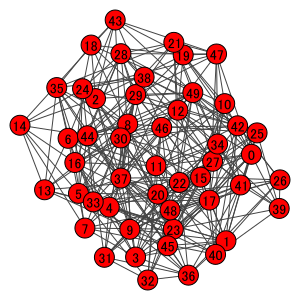

In [17]:
# for OR
for i in range(p - 1):
    for j in range(i + 1, p):
        if ad[i, j] != ad[j, i]:
            ad[i, j] = 1; ad[j, i] = 1
print(ad)
adj(ad)

In [18]:
from sklearn.linear_model import LogisticRegression
import scipy.stats as ss

In [19]:
df = pd.read_csv("breastcancer.csv")
df.drop(df.columns[len(df.columns) - 1], axis=1, inplace=True)
df = df.values

In [20]:
w = np.zeros((250, 1000))
for i in range(1000):
    w[:, i] = df[:, i]
w = (np.sign(w) + 1) / 2
p = 50; x = w[:, range(p)]; lambd = 0.15
x[x == 0] = -1
model = list()
for j in range(p):
    m3 = list(np.arange(j)); n3 = list(np.arange(j+1, p)); z3 = m3 + n3
    model.append(LogisticRegression(C=(1/(250*lambd)), penalty="l1", solver="liblinear",
                                    fit_intercept=True).fit(X=x[:, z3], y=x[:, j]))

[[0.         0.         0.         0.03115865 0.         0.
  0.         0.         0.         0.         0.03750535 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.03078726 0.         0.
  0.05827242 0.00053954 0.         0.         0.         0.
  0.         0.         0.14069464 0.138196   0.         0.
  0.         0.06922536 0.         0.15848545 0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
210.0


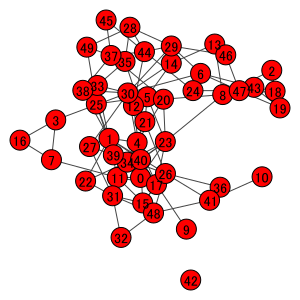

In [21]:
print(model[1].coef_)
ad = np.zeros((p, p))
for i in range(p):
    for j in range(p - 1):
        k = j
        if j >= i:
            k = j + 1
        if model[i].coef_[:, j] != 0:
            ad[i, k] = 1
        else:
            ad[i, k] = 0
for i in range(p - 1):
    for j in range(i + 1, p):
        if ad[i, j] != ad[i, j]:
            ad[i, j] = 0; ad[j, i] = 0
print(ad)
print(np.sum(ad)); adj(ad)

## 5.4 Joint Graphical Lasso

In [22]:
from scipy import sparse

In [23]:
# Use fused_dual and fused_prime in Chap. 4
def fused_2(y, D, lam_0):
    beta, lam = fused_prime(y, D)
    m, p = D.shape
    i = 0
    for k in range(1, m):
        if lam[k-1] < lam_0 <= lam[k]:
            i = k
    if lam_0 > lam[m-1]:
        beta_0 = beta[m-1, ]
    elif i == 0:
        beta_0 = beta[0, ]
    else:
        beta_0 = (beta[i-1, ]
                  + (lam_0 - lam[i-1]) / (lam[i] - lam[i-1]) * (beta[i, ] - beta[i-1, ]))
    return beta_0

In [24]:
# genlasso does not work only unless the size is at least three
def b_fused(y, lambd):
    if y[0] > y[1] + 2 * lambd:
        a = y[0] - lambd; b = y[1] + lambd
    elif y[0] < y[1] - 2 * lambd:
        a = y[0] + lambd; b = y[1] - lambd
    else:
        a = (y[0] + y[1]) / 2; b = a
    return [a, b]

In [25]:
# Fused Lasso that compares with all the pairs
def graph_fused(y=[], lambd1=None, lambd2=None):
    K = len(y)
    if K == 1: theta = y
    elif K == 2: theta = b_fused(y, lambd2)
    else:
        y = np.array(y)
        L = K * (K - 1) / 2; D = np.zeros((int(L), K))
        k = 0
        for i in range(K - 1):
            for j in range(i + 1, K):
                D[k, i] = 1; D[k, j] = -1; k = k + 1
        theta = fused_2(y, D, lambd2)
    theta = soft_th(lambd1, theta)
    return theta

In [26]:
# Joint Graphical Lasso
def jgl(X, lambd1, lambd2):
    K = len(X); p = np.array(X[1]).shape[1]; n = np.zeros(K); S = list()
    for k in range(K):
        n[k] = X[k].shape[0]; S.append(np.dot(X[k].T, X[k]) / n[k])
    rho = 1; lambd1 = lambd1 / rho; lambd2 = lambd2 / rho
    Theta = [0] * K
    for k in range(K): Theta[k] = np.diag([1] * p)
    Theta_old = [0] * K
    for k in range(K): Theta_old[k] = np.diag(np.random.normal(size=p))
    U = [0] * K
    for k in range(K): U[k] = np.zeros((p, p))
    Z = [0] * K
    for k in range(K): Z[k] = np.zeros((p, p))
    epsilon = 0; epsilon_old = 1; h = 0
    while np.abs(epsilon - epsilon_old) > 0.0001 * epsilon_old:
        h = h + 1
        Theta_old = c.deepcopy(Theta); epsilon_old = epsilon
        # Update for (a)
        for k in range(K):
            mat = S[k] - rho * Z[k] / n[k] + rho * U[k] / n[k]
            u, s, v = np.linalg.svd(mat)
            DD = n[k] / (2 * rho) * (-s + np.sqrt(np.square(s) + 4 * rho / n[k]))
            Theta[k] = np.dot(np.dot(v.T, np.diag(DD)), v)
        # Update for (b)
        for i in range(p):
            for j in range(p):
                A = list()
                for k in range(K): A.append(Theta[k][i, j] + U[k][i, j])
                if i == j: B = graph_fused(A, 0, lambd2)
                else: B = graph_fused(A, lambd1, lambd2)
                for k in range(K): Z[k][i, j] = B[k]
        # Update for (c)
        for k in range(K):
            U[k] = U[k] + Theta[k] - Z[k]
        # Check the convergence
        epsilon = 0
        for k in range(K):
            epsilon_new = np.max(np.abs(Theta[k] - Theta_old[k]))
            if epsilon_new > epsilon: epsilon = epsilon_new
    print("epsilon:", epsilon)
    print("M:", np.abs(epsilon - epsilon_old))
    print("epsilon_old * 0.0001:", epsilon_old * 0.0001)
    print("The number of while loop:", h)
    return Z

In [ ]:
# Replace the Update for (b) by the following (This does not work alone)
for i in range(p):
    for j in range(p):
        A = list()
        for k in range(K): A.append(Theta[k][i, j] + U[k][i, j])
        if i == j:
            B = A
        else:
            B = soft_th(lambd1 / rho, A) * np.max(
                1 - lambd2 / rho / np.sqrt(
                    np.linalg.norm(soft_th(lambd1 / rho, A), 2) ** 2), 0)
        for k in range(K):
            Z[k][i, j] = B[k]

In [28]:
## From Chapter 4
def fused_dual(y, D):
    m = D.shape[0]
    lambda_seq = np.zeros(m)
    s = np.zeros(m)
    alpha = np.zeros((m, m))
    alpha[0, :] = np.linalg.pinv(D @ D.T) @ D @ y
    for j in range(m):
        if np.abs(alpha[0, j]) > lambda_seq[0]:
            lambda_seq[0] = np.abs(alpha[0, j])
            index = [j]
            if alpha[0, j] > 0:
                s[j] = 1
            else:
                s[j] = -1
    f_s = list(range(m))
    for k in range(1, m):
        sub_s = list(set(f_s) - set(index))
        U = np.linalg.pinv(D[sub_s, :] @ D[sub_s, :].T)
        V = D[sub_s, :] @ D[index, :].T
        u = U @ D[sub_s, :] @ y
        v = U @ V @ s[index]
        t = u / (v+1)
        for i in range(0, m-k):
            if t[i] > lambda_seq[k]:
                lambda_seq[k] = t[i]
                h = i
                r = 1
        t = u / (v-1)
        for i in range(0, m-k):
            if t[i] > lambda_seq[k]:
                lambda_seq[k] = t[i]
                h = i
                r = -1
        alpha[k, index] = lambda_seq[k] * s[index]
        alpha[k, sub_s] = u - lambda_seq[k] * v
        h = sub_s[h]
        index.append(h)
        if r == 1:
            s[h] = 1
        else:
            s[h] = -1
    return [alpha, lambda_seq]
def fused_prime(y, D):
    alpha, lambda_seq = fused_dual(y, D)
    m = D.shape[0]
    return [np.tile(y, (m, 1)).T - D.T @ alpha.T, lambda_seq]

epsilon: 3.4416913763379853e-15
M: 0.0
epsilon_old * 0.0001: 3.4416913763379856e-19
The number of while loop: 2019
[[ 1.1183545  -0.          0.          0.11889287 -0.          0.02021306
   0.21778368  0.          0.03997366 -0.21386185]
 [-0.          1.00851662  0.01184705 -0.          0.03914789  0.10918701
  -0.         -0.05728264 -0.02357386  0.0843271 ]
 [ 0.          0.01184705  1.30467352 -0.2795311   0.         -0.05943228
  -0.01968344 -0.13687556  0.03137038 -0.0209026 ]
 [ 0.11889287 -0.         -0.2795311   1.69310428 -0.0202897   0.14802962
  -0.12294348  0.          0.05704316  0.        ]
 [-0.          0.03914789  0.         -0.0202897   1.30553808 -0.07087619
  -0.          0.06587259 -0.06954891 -0.1019513 ]
 [ 0.02021306  0.10918701 -0.05943228  0.14802962 -0.07087619  0.82480602
   0.          0.01812686 -0.         -0.11907168]
 [ 0.21778368 -0.         -0.01968344 -0.12294348 -0.          0.
   1.34145195 -0.22892946  0.11436176  0.        ]
 [ 0.         -0.0

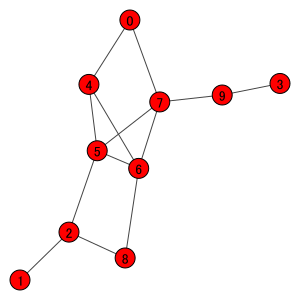

In [29]:
p = 10; K = 2; N = 100; n = np.zeros(K); X = list()
for k in range(K):
    n[k] = N / K
    X.append(np.random.normal(size=(int(n[k]), p)))
for k in range(1, K-1):
    X[k] = X[k - 1] + np.random.normal(size=(int(n[k]), p)) * 0.1
Theta = jgl(X, 3, 0.01)
print(Theta[0])
adj(Theta[0])
adj(Theta[1])
p = 10; K = 3; N = 100; n = np.zeros(K); X = list()
for k in range(K):
    n[k] = N / K
    X.append(np.random.normal(size=(int(n[k]), p)))
for k in range(1, K-1):
    X[k] = X[k - 1] + np.random.normal(size=(int(n[k]), p)) * 0.1
Theta2 = jgl(X, 3, 0.01)
adj(Theta2[0])

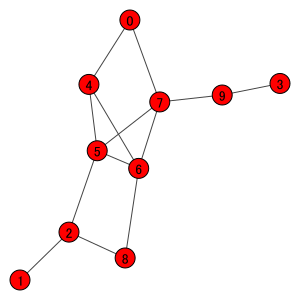

In [30]:
adj(Theta2[1])

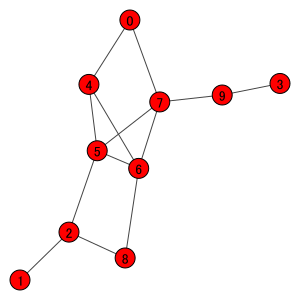

In [31]:
adj(Theta2[2])